## A simple explanation of the Monty Hall problem 
The Monty Hall problem is a famous example of the counter-intuitive aspects of probabilistic reasoning. To an extent that it is considered a "paradox". Well not really a paradox, but rather a special kind of paradox called "veridical paradox", which is a result that appears unlikely to most people [1]. 

For completeness, I will state the Monty Hall problem as was presented in Marilyn Vos Savant's webpage [2]:

*Suppose you’re on a game show, and you’re given the choice of three doors. Behind one door is a car, behind the others, goats. You pick a door, say #1, and the host, who knows what’s behind the doors, opens another door, say #3, which has a goat. He says to you, "Do you want to pick door #2?" Is it to your advantage to switch your choice of doors?*


### Coming up with an understandable justification
Many people at first glance will answer that it makes no difference if we change our choice. However, it can be shown, both through reasoning and Monte Carlo simulations, that it the probability of winning increases if we change our choice. Below I will provide a quick reasoning, which I haven't seen elsewhere. Followed by a simulation that proves justifies the answer. 

#### The host is affected by our choice
Let's say, the contestant picks the right door. We know this happens with probability $1/3$. In that case, Monty (aka the host) has two options to choose from (i.e., a set of size 2), which is on par with the case that it is to the contenstant's benefit to stick with the first selection. 
On the other hand, if a wrong door is selected, which we know has probability $2/3$, Monty can only choose from a set of size one, and the contestant benefits from switching. So it is clear that switching leads to winning with probability $2/3$. 

Our justification implies that the expected value of the size of the set that Monty can choose from, contrary to our instincts, is NOT $3/2 = 1/2(1) + 1/2(2)$. Meaning that the contestants choice limits Monty's choice with more probability. The actual expected size of the set Monty can choose from is $1/3(2) + 2/3(1)$, which is slightly less than $1.5$. This is why I think most people get the answer wrong, because our instinct is that Monty's choice is unbiased, while it is easy to show that it isn't. 

### Simulation
Here is a simulation for our explanation above:

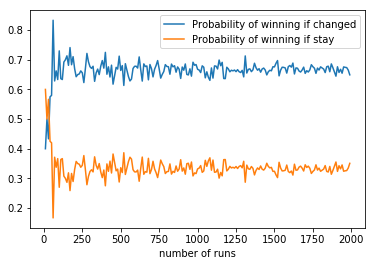

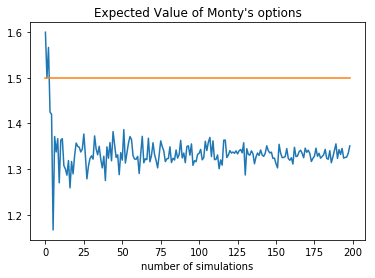

In [9]:
import numpy as np
probability_win_change = []
probability_win_stay = []
n_trials_list = range(10,2000,10)
size_goats_list = []
for n_trials in n_trials_list:
    car = np.random.randint(3,size=(n_trials,1))+1
    first_selection = np.random.randint(3,size=(n_trials,1))+1
    prob_with_change = 0
    prob_no_change = 0
    size_goats = 0
    for i in range(n_trials):
        goats = [j for j in range(1,4) if j!=car[i] and j!=first_selection[i]]
        size_goats+= len(goats)/n_trials
        monty=np.random.choice(goats, 1)
        change_selection = [j for j in range(1,4) if j!=monty[0] and j!=first_selection[i]]
        prob_with_change += 1.0*(change_selection[0]==car[i])/n_trials
        prob_no_change += 1.0*(first_selection[i]==car[i])/n_trials

    probability_win_change.append(prob_with_change)
    probability_win_stay.append(prob_no_change)
    size_goats_list.append(size_goats)
import pylab
pylab.plot(n_trials_list,probability_win_change)
pylab.plot(n_trials_list,probability_win_stay)
pylab.legend(['Probability of winning if changed','Probability of winning if stay'])
pylab.xlabel('number of runs')
pylab.show()
pylab.plot(size_goats_list)
pylab.plot(1.5*np.ones((len(size_goats_list),1)))
pylab.title("Expected Value of Monty's options")
pylab.xlabel("number of simulations")
pylab.show()

### References
[1] Monty Hall Problem, Wikipedia, [Available Online](https://en.wikipedia.org/wiki/Monty_Hall_problem), Last visited in 2018.

[2] Vos Savant, Game Show Problem, Person Webpage, [Available Online](http://marilynvossavant.com/game-show-problem/), Last visited in 2018. 